In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp

In [2]:
#Load data
g_jazz = nx.read_gml("data/graph_jazz_collab.gml")
g_polblog = nx.read_gml("data/graph_polblog.gml")
g_terrorists = nx.read_gml("data/graph_terrorists.gml")

In [37]:
#A03.1 Centrality correlations
#1. The degree 𝑘𝑖, closeness 𝑐𝑖, betweenness 𝑏𝑖 and eigenvector 𝑒𝑖 centrality
#2. Then do a scatter plot for each pair of centralities (6 plots total)
#3. Compute Pearson’s, Spearman’s and Kendall’s correlation coefficients 
#   for each pair and note them on the scatter plots;
from cProfile import label


def plot(x, y, label1, label2):
    a = np.array([x[i] for i in x])
    b = np.array([y[j] for j in y])

    #Compute 3 correlations
    pearson = sp.pearsonr(a, b)[0]
    spearman = sp.spearmanr(a, b)[0]
    kendall = sp.kendalltau(a, b)[0]

    #plot
    plt.scatter(x.values(), y.values())
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.title(label1 + "-" + label2)
    plt.text(max(x.values())+0.05, max(y.values())+0.05, "Pearson: " + str(pearson))
    plt.text(max(x.values())+0.05, max(y.values()), "Spearman: " + str(spearman))
    plt.text(max(x.values())+0.05, max(y.values())-0.05, "Kendall: " + str(kendall))
    plt.show()

def centrality_correlation(graph, label1, label2):
    #Compute for 4 centralities 
    deg_cen = nx.degree_centrality(graph)
    close_cen = nx.closeness_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    eigen_cen = nx.eigenvector_centrality(graph)

    #Plot
    if label1 == "degree" and label2 == "closeness":
        plot(deg_cen, close_cen, label1, label2)
    elif label1 == "degree" and label2 == "betweeness":
        plot(deg_cen, bet_cen, label1, label2)
    elif label1 == "degree" and label2 == "eigenvector":
        plot(deg_cen, eigen_cen, label1, label2)
    elif label1 == "closeness" and label2 == "betweeness":
        plot(close_cen, bet_cen, label1, label2)
    elif label1 == "closeness" and label2 == "eigenvector":
        plot(close_cen, eigen_cen, label1, label2)
    elif label1 == "betweeness" and label2 == "eigenvector":
        plot(bet_cen, eigen_cen, label1, label2)

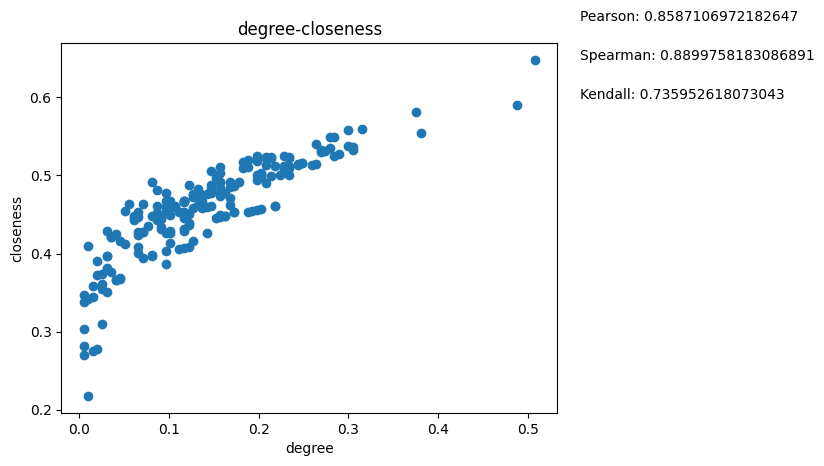

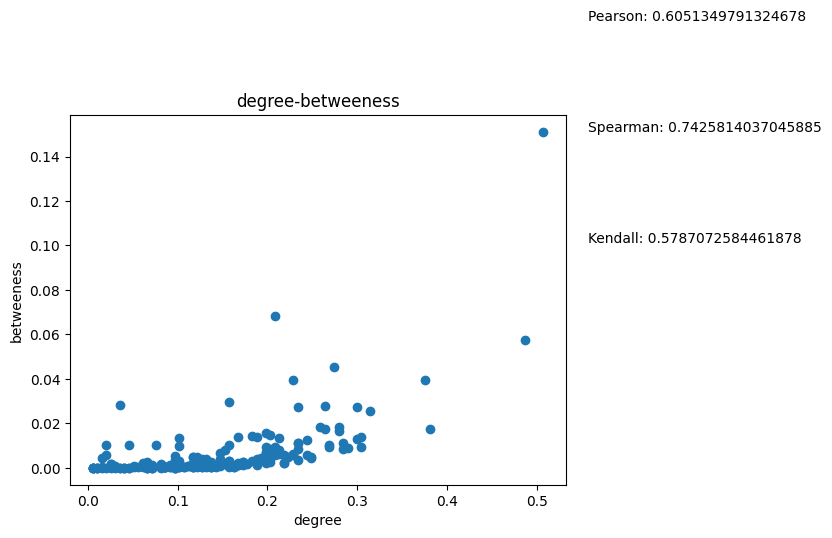

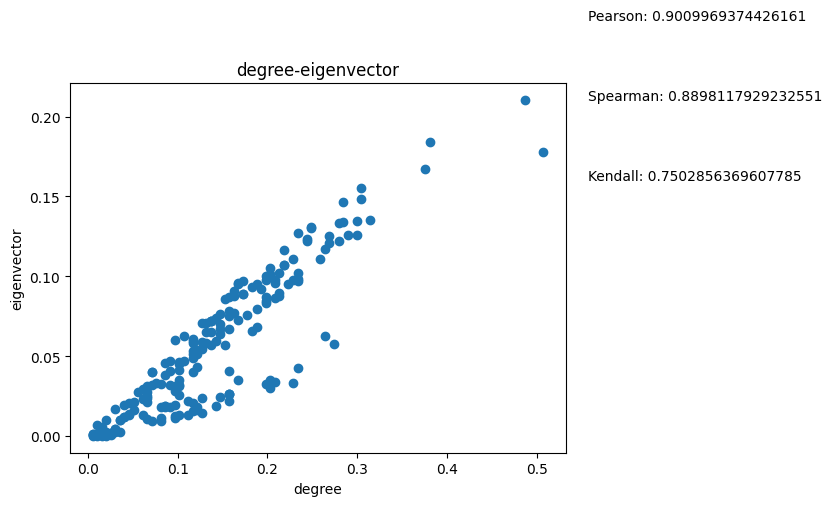

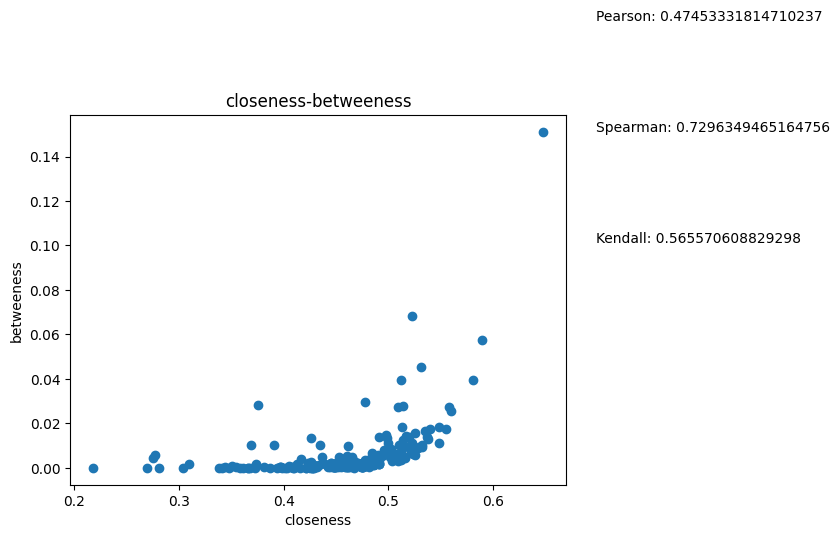

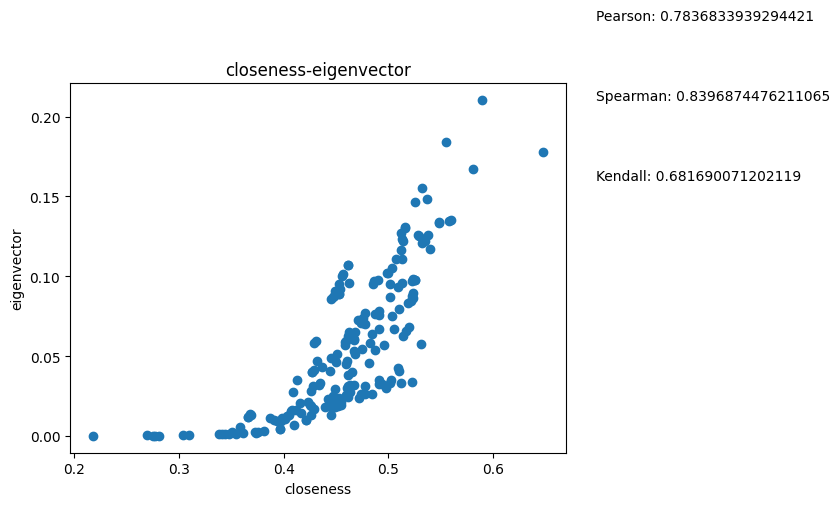

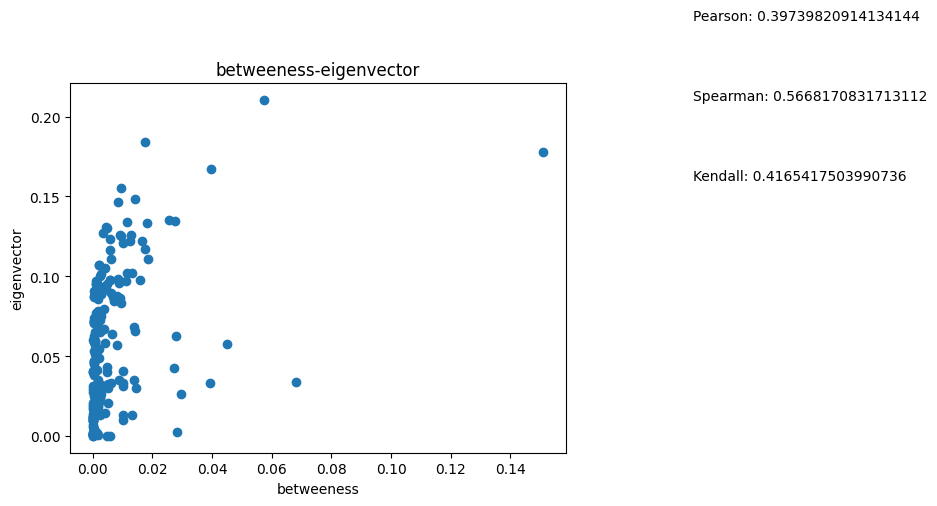

In [38]:
#Dataset_Jazz
centrality_correlation(g_jazz, "degree", "closeness")
centrality_correlation(g_jazz, "degree", "betweeness")
centrality_correlation(g_jazz, "degree", "eigenvector")
centrality_correlation(g_jazz, "closeness", "betweeness")
centrality_correlation(g_jazz, "closeness", "eigenvector")
centrality_correlation(g_jazz, "betweeness", "eigenvector")

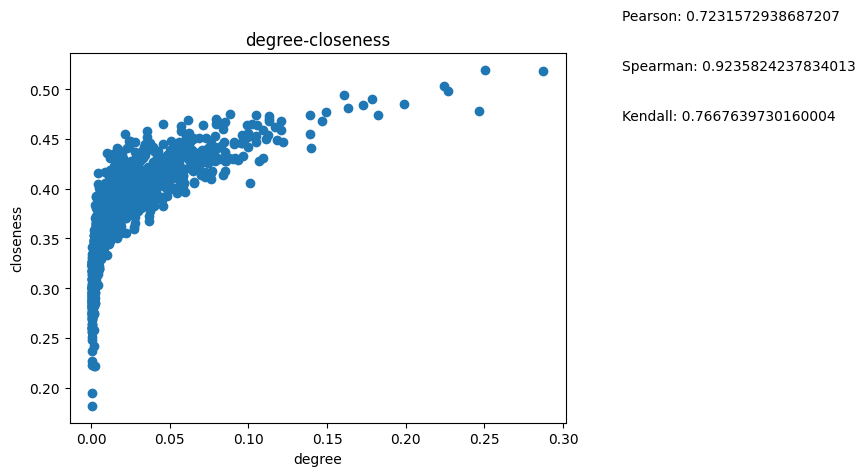

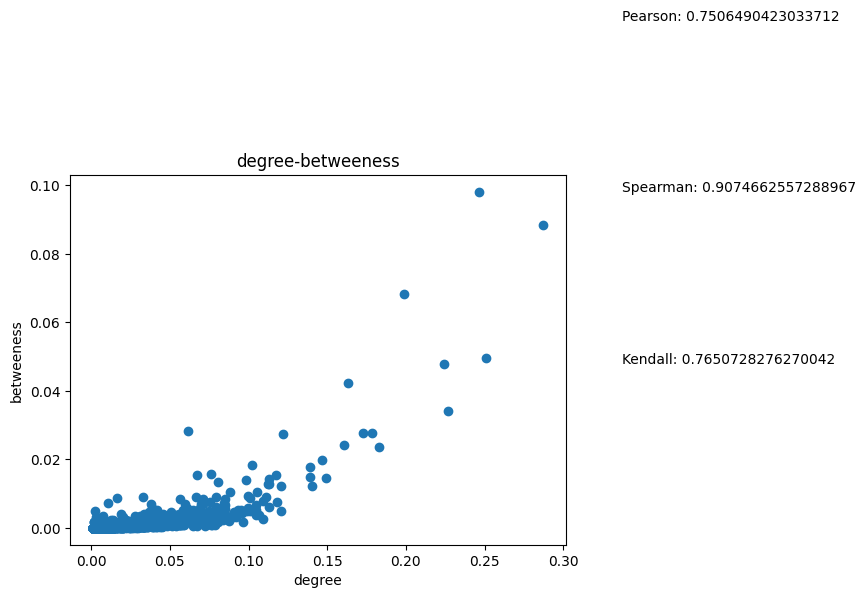

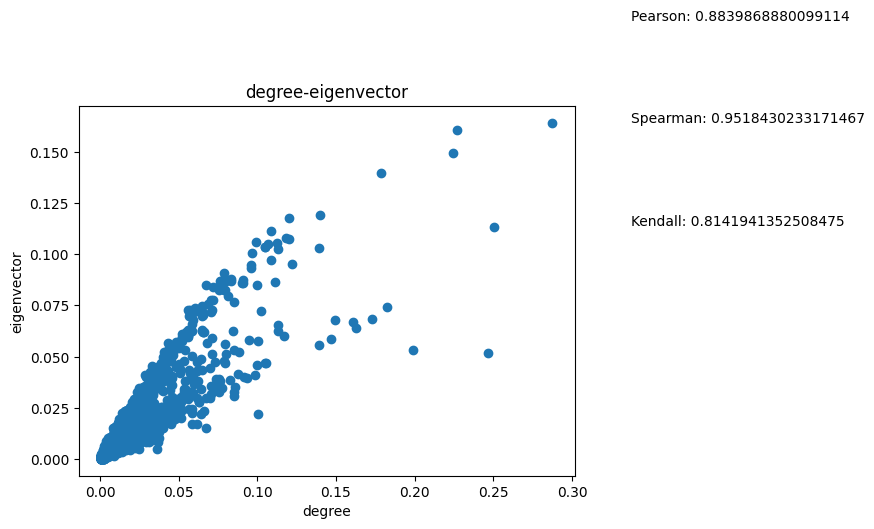

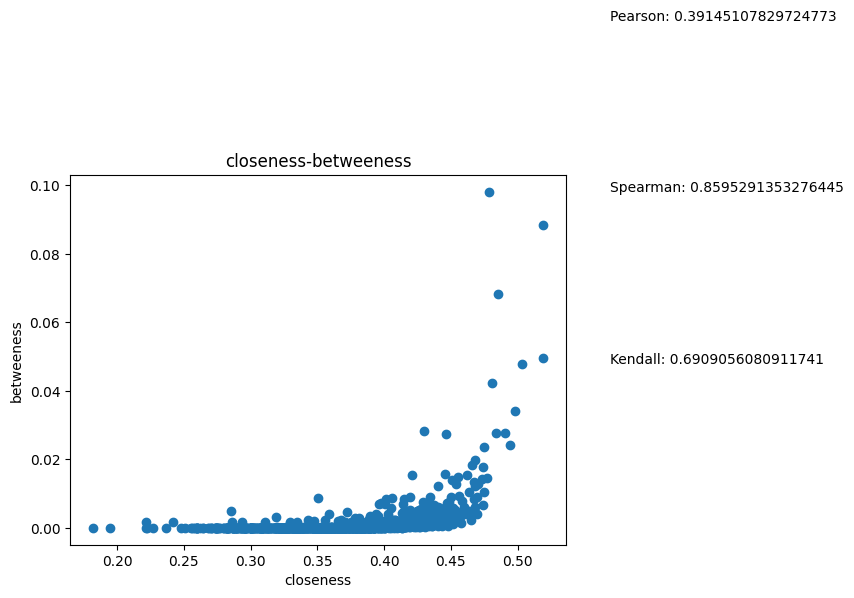

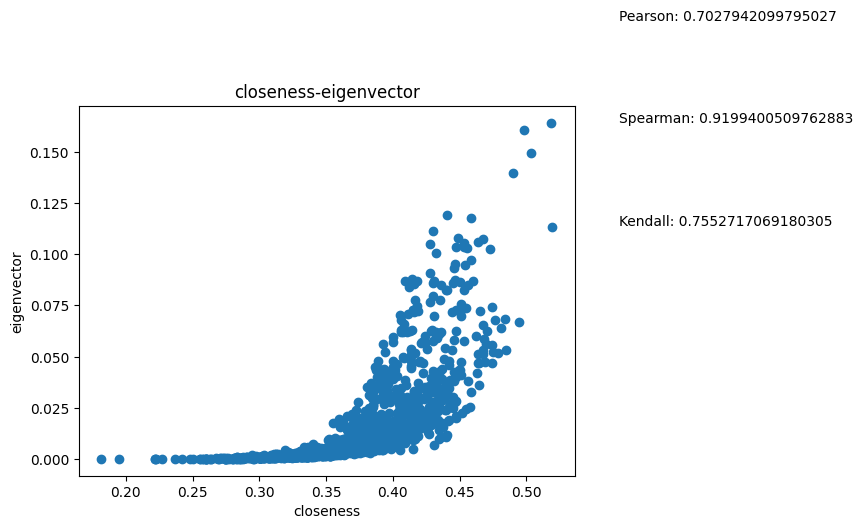

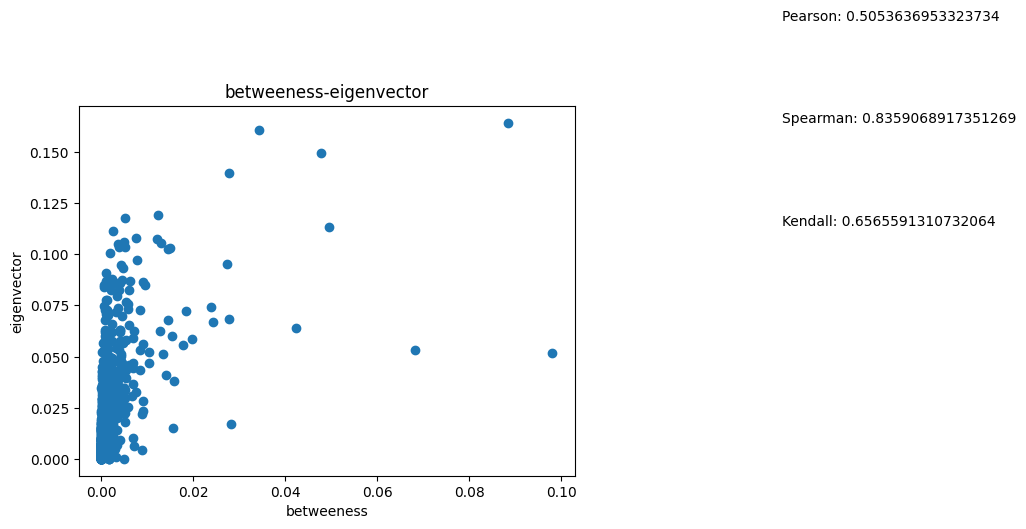

In [39]:
#Dataset_polblog
centrality_correlation(g_polblog, "degree", "closeness")
centrality_correlation(g_polblog, "degree", "betweeness")
centrality_correlation(g_polblog, "degree", "eigenvector")
centrality_correlation(g_polblog, "closeness", "betweeness")
centrality_correlation(g_polblog, "closeness", "eigenvector")
centrality_correlation(g_polblog, "betweeness", "eigenvector")

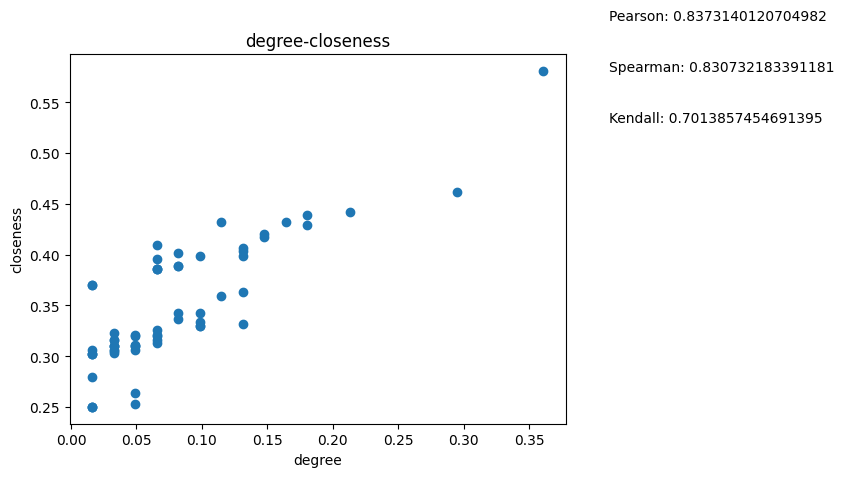

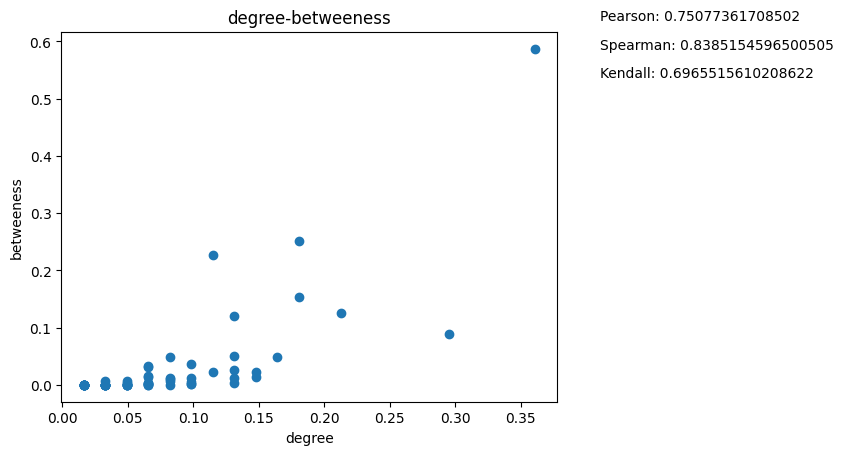

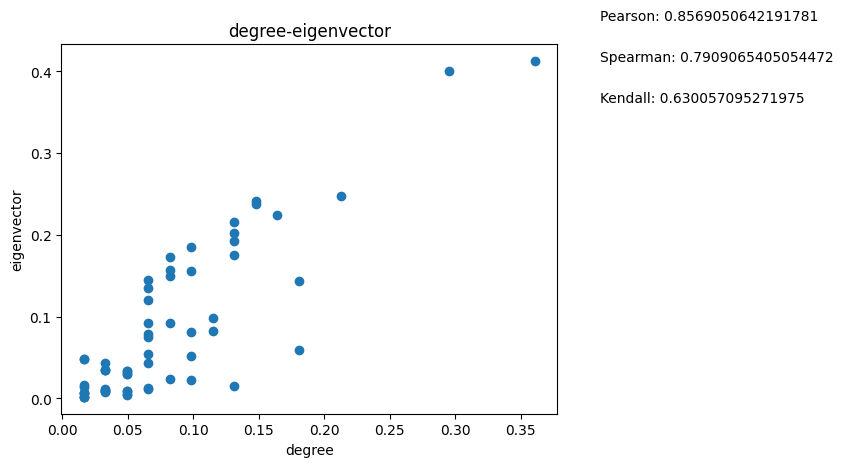

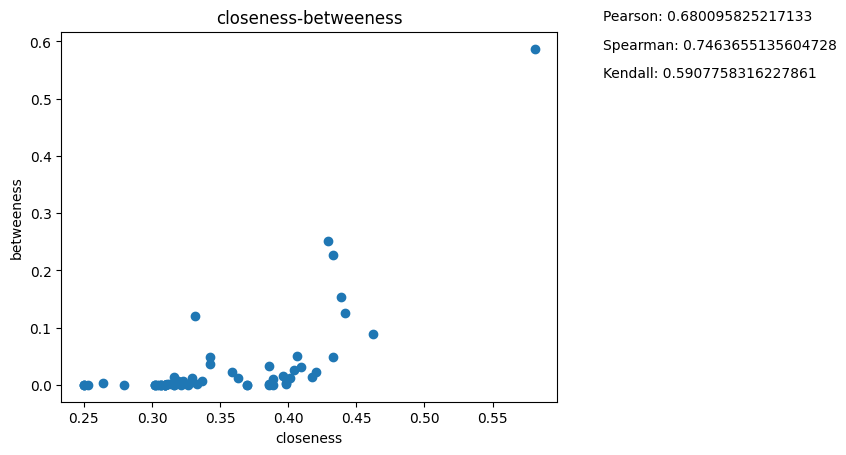

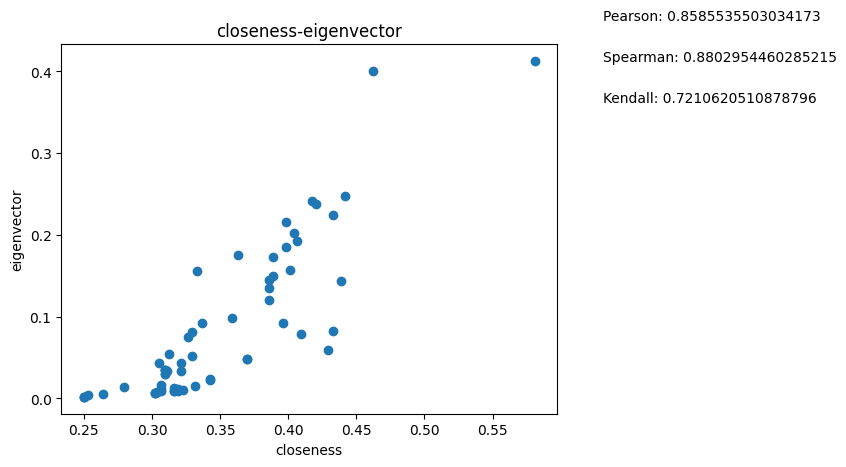

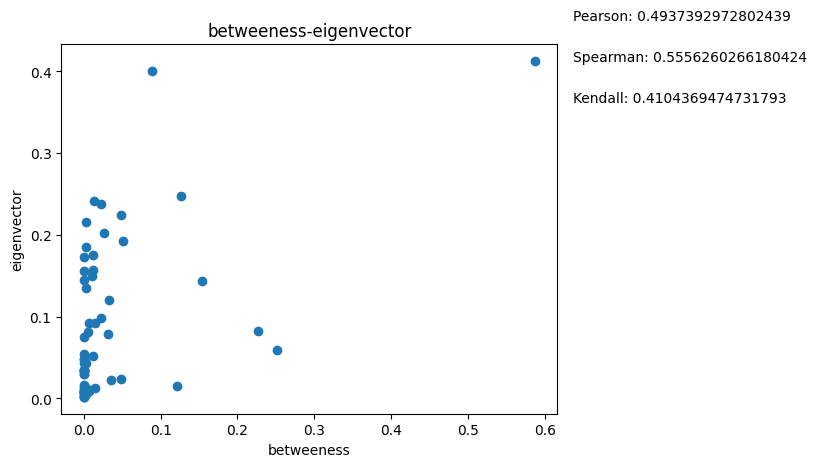

In [40]:
#Dataset_terrorists
centrality_correlation(g_terrorists, "degree", "closeness")
centrality_correlation(g_terrorists, "degree", "betweeness")
centrality_correlation(g_terrorists, "degree", "eigenvector")
centrality_correlation(g_terrorists, "closeness", "betweeness")
centrality_correlation(g_terrorists, "closeness", "eigenvector")
centrality_correlation(g_terrorists, "betweeness", "eigenvector")

Q: Briefly explain, for the Jazz collaborations data, what each of
the centrality measures means in practice.

A:

In [41]:
#A03.2 Centrality and randomisation
#1. For each dataset 𝒢, randomise it to obtain a network 𝒢𝑟𝑛�
grnd_jazz = nx.algorithms.smallworld.random_reference(g_jazz,niter = 20, connectivity=False)
grnd_polblog = nx.algorithms.smallworld.random_reference(g_polblog,niter = 20, connectivity=False)
grnd_terrorists = nx.algorithms.smallworld.random_reference(g_terrorists,niter = 20, connectivity=False)

In [ ]:
#2. Do a scatter plot of each centrality before vs. after randomisation (e.g. 𝑘𝑟𝑛𝑑𝑖 vs 𝑘𝑖) 
# and compute the corresponding correlation coefficient.

Q: Why do you get that result for degree centrality?

A:

In [ ]:
#A03.3 Page Rank